In [37]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from scipy.sparse import hstack
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [11]:
data = pd.read_csv('model_data.csv')
val_data = pd.read_csv('valid_data.csv')

In [44]:
data

,url,IP_LIKE,AT,URL_Depth,Redirection,Is_Https,TINY_URL,Check_Hyphen,Query,Domain_Age,Domain_end,Mouseover,Web_forwards,Hyperlinks,Domain_Cons,Tokenized_url,Label
0,http://socialdisasterscommission.go.kr/,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,socialdisasterscommission go kr,0
1,http://www.bai.go.kr/mobile/index.do,0.0,0.0,2.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,1.0,www bai go kr mobile index.do,0
2,http://www.bai.go.kr,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,1.0,www bai go kr,0
3,http://www.bai.go.kr/child/index.do,0.0,0.0,2.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,1.0,www bai go kr child index.do,0
4,http://www.pasa.go.kr,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,www pasa go kr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289989,https://tribelio.page/security1st-business,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,tribelio page security1st-business,1
289990,https://docs.google.com/presentation/d/e/2PACX...,0.0,0.0,5.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,docs google com presentation d e 2PACX-1vTc0SW...,1
289991,https://alertadecuentas.webcindario.com/,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,alertadecuentas webcindario com,1
289992,https://docs.google.com/presentation/d/e/2PACX...,0.0,0.0,5.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,docs google com presentation d e 2PACX-1vTc0SW...,1


In [45]:
val_data

,url,IP_LIKE,AT,URL_Depth,Redirection,Is_Https,TINY_URL,Check_Hyphen,Query,Domain_Age,Domain_end,Mouseover,Web_forwards,Hyperlinks,Domain_Cons,Tokenized_url,Label
0,https://cazasolution.com,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1.0,1.0,cazasolution com,0
1,https://cedarandmoss.com,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,cedarandmoss com,0
2,https://cfesuccess.com,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1.0,1.0,cfesuccess com,0
3,https://cgitoronto.gov.in,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,-1.0,0.0,cgitoronto gov in,0
4,https://chaletnicholas.ca,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,chaletnicholas ca,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,http://www.gwenet.org/,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,1.0,-1.0,1.0,www gwenet org,1
69996,http://files.planetaryedges.workers.dev,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,0.0,-1.0,1.0,files planetaryedges workers dev,1
69997,https://docs.google.com/presentation/d/e/2PACX...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,docs google com presentation d e 2PACX-1vRgVRg...,1
69998,https://docs.google.com/presentation/d/e/2PACX...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,docs google com presentation d e 2PACX-1vTEHkE...,1


<Axes: xlabel='Label'>

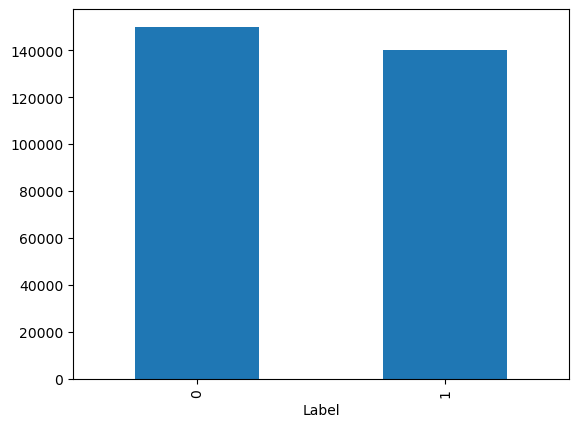

In [29]:
data['Label'].value_counts().plot(kind='bar')

<Axes: xlabel='Label'>

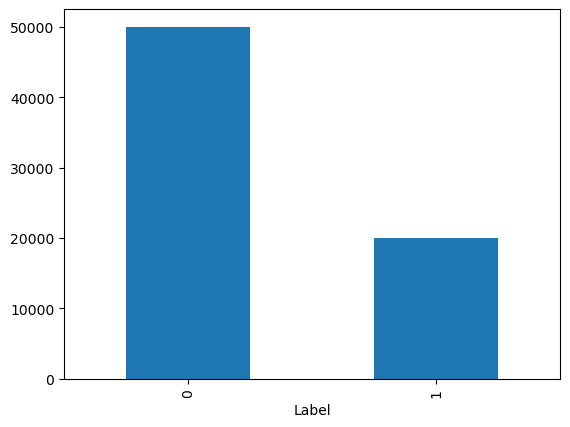

In [30]:
val_data['Label'].value_counts().plot(kind='bar')

In [20]:
# 훈련용 데이터

# 텍스트 피처 벡터화
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Tokenized_url'])

# 다른 피처들과 결합
# Tokenized_url을 제외한 나머지 피처들
other_features = data.drop(columns=['url', 'Label', 'Tokenized_url'])
X_other = other_features.values

# 희소 행렬과 밀집 행렬 결합
X = hstack([X_text, X_other])

# 종속 변수
y = data['Label']

# 데이터를 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 검증용 데이터
shuffled_val_data = val_data.sample(frac=1, random_state=0).reset_index(drop=True)

# 텍스트 피처 벡터화 (훈련 데이터에서 학습한 vectorizer 사용)
X_val_text = vectorizer.transform(shuffled_val_data['Tokenized_url'])

# 다른 피처들과 결합
# Tokenized_url을 제외한 나머지 피처들
val_other_features = shuffled_val_data.drop(columns=['url', 'Label', 'Tokenized_url'])
X_val_other = val_other_features.values

# 희소 행렬과 밀집 행렬 결합
X_val = hstack([X_val_text, X_val_other])

# 종속 변수
y_val = shuffled_val_data['Label']

# 각 데이터의 크기 확인
print("훈련 데이터 크기:", X_train.shape, y_train.shape)
print("검증 데이터 크기:", X_val.shape, y_val.shape)
print("테스트 데이터 크기:", X_test.shape, y_test.shape)

훈련 데이터 크기: (231995, 198323) (231995,)
검증 데이터 크기: (70000, 198323) (70000,)
테스트 데이터 크기: (57999, 198323) (57999,)


In [31]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 url = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'피싱 url = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

print('--------테스트 데이터의 비율-----------')
print(f'정상 ur = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'피싱 ur = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'정상 ur = {round(y_val.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'피싱 ur = {round(y_val.value_counts()[1]/len(y_test) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 url = 51.698%
피싱 url = 48.302%
--------테스트 데이터의 비율-----------
정상 ur = 51.834%
피싱 ur = 48.166%
--------검증 데이터의 비율-----------
정상 ur = 86.208%
피싱 ur = 34.483%


In [24]:
# 파이프라인 설정
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # with_mean=False is necessary for sparse matrix
    ('classifier', LGBMClassifier())
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'classifier__num_leaves': [31, 63],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [-1, 15, 30]
}

# 그리드 서치 설정
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 89647, number of negative: 95949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3783
[LightGBM] [Info] Number of data points in the train set: 185596, number of used features: 1515
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483022 -> initscore=-0.067937
[LightGBM] [Info] Start training from score -0.067937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [26]:
# 최적의 하이퍼파라미터로 모델 설정
best_params = {
    'learning_rate': 0.1,
    'max_depth': -1,
    'n_estimators': 100,
    'num_leaves': 31
}

# 최적의 모델 훈련
best_model = LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

# 테스트 데이터에 대한 최적 모델 평가
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

# 검증 데이터에 대한 최적 모델 평가
val_accuracy = best_model.score(X_val, y_val)
print("Validation accuracy: {:.2f}".format(val_accuracy))
# 검증 데이터에 대한 예측
val_predictions = gbm.predict(X_val, num_iteration=gbm.best_iteration)
val_predictions = (val_predictions > 0.5).astype(int)  # 임계값을 0.5로 설정하여 이진 분류

[LightGBM] [Info] Number of positive: 112058, number of negative: 119937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.148998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4772
[LightGBM] [Info] Number of data points in the train set: 231995, number of used features: 1971
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483019 -> initscore=-0.067950
[LightGBM] [Info] Start training from score -0.067950
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\basic.py:1192: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')
C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\basic.py:1192: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


In [33]:
# 테스트 데이터에 대한 예측
y_test_pred = best_model.predict(X_test)
# 검증 데이터에 대한 예측
y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

# 테스트 데이터에 대한 평가 지표 계산
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

print("Test accuracy: {:.2f}".format(test_accuracy))
print("Test F1 score: {:.2f}".format(test_f1))
print("Test recall: {:.2f}".format(test_recall))
print("Test precision: {:.2f}".format(test_precision))

# 검증 데이터에 대한 평가 지표 계산
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)

print("Validation accuracy: {:.2f}".format(val_accuracy))
print("Validation F1 score: {:.2f}".format(val_f1))
print("Validation recall: {:.2f}".format(val_recall))
print("Validation precision: {:.2f}".format(val_precision))

Test accuracy: 1.00
Test F1 score: 1.00
Test recall: 1.00
Test precision: 1.00
Validation accuracy: 1.00
Validation F1 score: 1.00
Validation recall: 1.00
Validation precision: 1.00


C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\basic.py:1192: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')
C:\ProgramData\anaconda3\Lib\site-packages\lightgbm\basic.py:1192: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


오차행렬:
 [[49999     1]
 [    0 20000]]


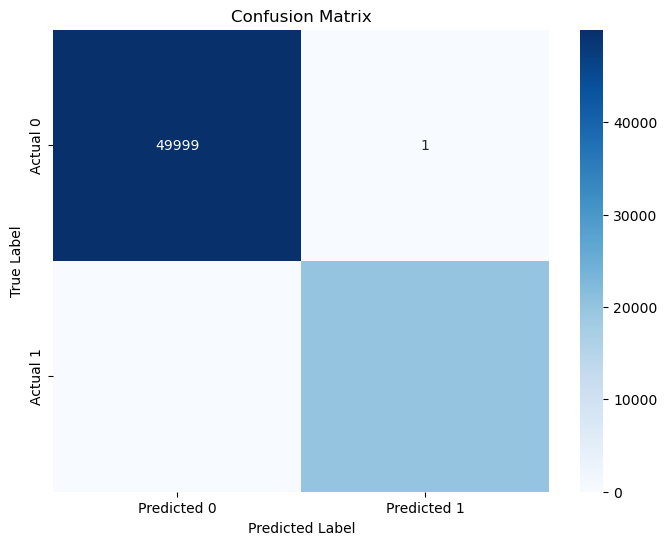

In [43]:
# 오차 행렬 시각화
cm = confusion_matrix(y_val, y_val_pred)
print('오차행렬:\n', cm)

# 오차 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Top 15 Feature Importances')

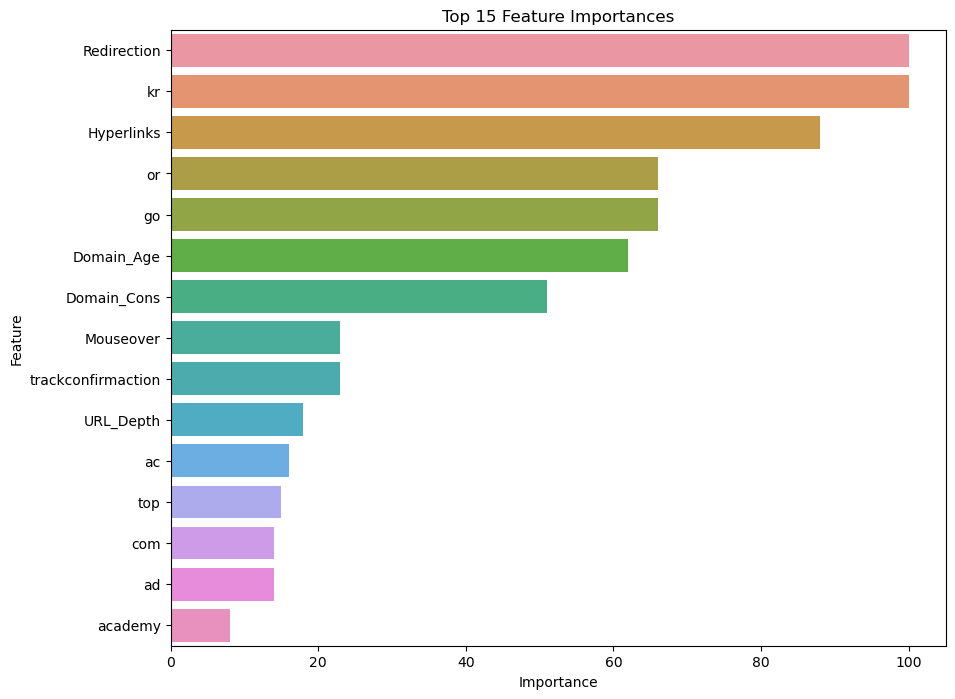

In [48]:
# 특성 중요도 추출
feature_importances = best_model.feature_importances_

# 텍스트 피처의 이름을 가져옴
text_features = vectorizer.get_feature_names_out()

# 다른 피처의 이름을 가져옴
other_feature_names = other_features.columns

# 전체 피처의 이름을 결합
all_feature_names = np.concatenate([text_features, other_feature_names])

# 특성 중요도와 피처 이름을 결합하여 데이터프레임 생성 및 정렬
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 상위 15개의 특성 중요도를 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances')